In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

solver = "ECOS"
save_data = False

In [2]:
# from kelly_gambling import *
# dataset = "kelly"

from power_network import *
dataset = "power_network"

# from cvar_stock_option import *
# dataset = "cvar"

# from exp_density_polynomial import *
# dataset = "exp"

# from news_vendor import *
# dataset = "vecnewsven"

device = cuda


In [3]:
from osmm import OSMM

In [4]:
import pickle
import datetime

In [5]:
max_num_rounds = 80

In [6]:
alg_props = {
#     "latest M cuts": [0, "LatestM", 20],
#     "all active cuts": [1, "AllActive", 30],
    "Original": [0, False],
    "Exact g eval in line search": [1, True]
}
    
num_algs = len(alg_props)

In [7]:
# Define structs:
objfs = np.zeros((num_algs, max_num_rounds))
objfs_validation = np.zeros((num_algs, max_num_rounds))
runtimes = np.zeros((num_algs, max_num_rounds))
iters_takens = np.zeros(num_algs)
damping_facs = np.ones((num_algs, max_num_rounds))
mus = np.ones((num_algs, max_num_rounds))
ts = np.ones((num_algs, max_num_rounds))
Xs = np.zeros((n, num_algs, max_num_rounds))
lower_bounds = np.ones((num_algs, max_num_rounds)) * (-np.inf)
best_xs = np.zeros((n, num_algs))
v_norms = np.zeros((num_algs, max_num_rounds))
num_f_evals = np.zeros((num_algs, max_num_rounds))
rms_residuals = np.zeros((num_algs, max_num_rounds))
q_norms = np.zeros((num_algs, max_num_rounds))
f_grad_norms = np.zeros((num_algs, max_num_rounds))
time_cost_details = np.zeros((5, num_algs, max_num_rounds))
baseline_opt_objf = []
baseline_time_cost = []

In [8]:
print(N)

1000000


In [9]:
print("dataset = %s:" % (dataset))
W = generate_random_data()
if dataset == "kelly" or dataset == "exp":
    W_validation = None
else:
    W_validation = generate_random_data()
print("End generate data")

dataset = power_network:
End generate data


# define OSMM problem and run

In [10]:
osmm_prob = OSMM()
osmm_prob.f_torch.function = my_f_torch
osmm_prob.f_torch.W_torch = torch.tensor(W, dtype=torch.float)
# osmm_prob.f_torch.W_validate_torch = torch.tensor(W_validation, dtype=torch.float)
osmm_prob.g_cvxpy.variable = g_var
osmm_prob.g_cvxpy.objective = g_obj
osmm_prob.g_cvxpy.constraints = g_constr

In [11]:
for alg_name in alg_props:
    print("    " + alg_name + ":")
    alg_idx = alg_props[alg_name][0]
#     bundle_mode = alg_props[alg_name][1]
#     M = alg_props[alg_name][2]
#     exact_g_line_search = False
    M = 20
    bundle_mode = "LatestM"
    exact_g_line_search = alg_props[alg_name][1]
    osmm_prob.solve(init_val, max_iter=max_num_rounds, 
                    hessian_rank=20, gradient_memory=M,
                    solver=solver, use_termination_criteria=False, verbose=True,
                    bundle_mode=bundle_mode, exact_g_line_search=exact_g_line_search)

    Xs[:, alg_idx, :] = osmm_prob.method_results["var_iters"]
    objfs[alg_idx, :] = osmm_prob.method_results["objf_iters"]
    objfs_validation[alg_idx, :] = osmm_prob.method_results["objf_validate_iters"]
    lower_bounds[alg_idx, :] = osmm_prob.method_results["lower_bound_iters"]
    damping_facs[alg_idx, :] = osmm_prob.method_results["lam_iters"]
    mus[alg_idx, :] = osmm_prob.method_results["mu_iters"]
    ts[alg_idx, :] = osmm_prob.method_results["t_iters"]
    runtimes[alg_idx, :] = osmm_prob.method_results["time_iters"]
    best_xs[:, alg_idx] = osmm_prob.method_results["soln"]
    v_norms[alg_idx, :] = osmm_prob.method_results["v_norm_iters"]
    num_f_evals[alg_idx, :] = osmm_prob.method_results["num_f_evals_iters"]
    rms_residuals[alg_idx, :] = osmm_prob.method_results["rms_res_iters"]
    f_grad_norms[alg_idx, :] = osmm_prob.method_results["f_grad_norm_iters"]
    q_norms[alg_idx, :] = osmm_prob.method_results["q_norm_iters"]
    time_cost_details[:, alg_idx, :] = osmm_prob.method_results["time_detail_iters"]
    iters_takens[alg_idx] = osmm_prob.method_results["total_iters"]
    print("")

    Original:
iter = 10, objf = 1.556e+03, lower bound = 1.353e+03, RMS residual = 3.726e-01, ||G||_F = 2.827e+00
iter = 20, objf = 1.535e+03, lower bound = 1.459e+03, RMS residual = 1.175e-01, ||G||_F = 4.287e+00
iter = 30, objf = 1.534e+03, lower bound = 1.495e+03, RMS residual = 6.785e-02, ||G||_F = 3.599e+00
iter = 40, objf = 1.533e+03, lower bound = 1.522e+03, RMS residual = 1.285e-02, ||G||_F = 3.472e+00
iter = 50, objf = 1.533e+03, lower bound = 1.530e+03, RMS residual = 4.344e-03, ||G||_F = 3.520e+00
iter = 60, objf = 1.533e+03, lower bound = 1.532e+03, RMS residual = 9.900e-04, ||G||_F = 3.496e+00
iter = 70, objf = 1.533e+03, lower bound = 1.533e+03, RMS residual = 3.443e-04, ||G||_F = 4.219e+00
      Terminated. Num iterations = 79, objf = 1.533e+03, lower bound = 1.533e+03, RMS residual = 6.932e-05.
      Time elapsed (secs): 17.356074.


    Exact g eval in line search:
iter = 10, objf = 1.556e+03, lower bound = 1.353e+03, RMS residual = 3.726e-01, ||G||_F = 2.827e+00
iter 

# plot

0.216950923204422
0.26706176400184634


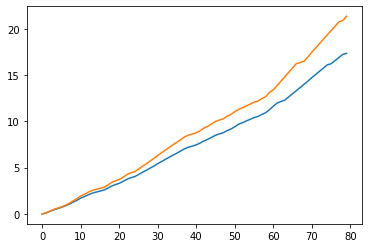

In [12]:
plt.plot(np.cumsum(runtimes[0, :]))
plt.plot(np.cumsum(runtimes[1, :]))
print(np.mean(runtimes[0, 0:80]))
print(np.mean(runtimes[1, 0:80]))

3.907997863460112
3.9103449292445918


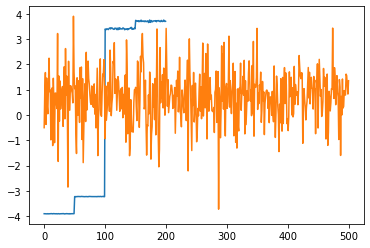

In [13]:
if dataset == "power_network":
    print(cp.norm(u_var, 'inf').value)
    print(cp.norm(g_var, 'inf').value)
    plt.plot(g_var.value)
    plt.plot(u_var.value)

In [14]:
start_idx = 0
objfs_running_min = np.array(objfs)
for alg_idx in range(num_algs):
    tmp_min = objfs[alg_idx, start_idx]
    for i in range(start_idx + 1, max_num_rounds):
        tmp_min = min(objfs[alg_idx, i], tmp_min)
        objfs_running_min[alg_idx, i] = tmp_min

In [15]:
linewidth = 2

In [16]:
colors = ["blue"] + ["violet"]

In [17]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines
legend_elements = [Patch(facecolor="blue", edgecolor="blue", label="Without g eval"),
                   Patch(facecolor="violet", edgecolor="violet", label="Exact g eval"),
                   mlines.Line2D([], [], color='k', label="Suboptimality"),
                   mlines.Line2D([], [], linestyle='--', color='k', label="Gap"),
#                        Patch(facecolor="blue", edgecolor="blue", label="$r=50$"),   
#                        mlines.Line2D([], [], linestyle=':', color='k', label="$M=1$"),
#                        
                  ]

Text(0, 0.5, 'Suboptimality')

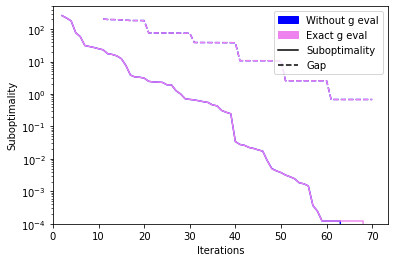

In [18]:
f,ax = plt.subplots()

for alg_idx in range(num_algs):
    ax.semilogy(np.arange(1, 71),
        objfs_running_min[alg_idx, 0:70] - np.min(objfs), 
                linewidth=0.7*linewidth, color=colors[alg_idx], linestyle="solid")
    
for alg_idx in range(num_algs):
    ax.semilogy(np.arange(1, 71),
                objfs_running_min[alg_idx, 0:70] - lower_bounds[alg_idx, 0:70], 
                linewidth=0.7*linewidth, color=colors[alg_idx], linestyle="dashed")

ax.set_xlim(left=0)
ax.set_ylim([1e-4, 5e2])
ax.set_xlabel("Iterations")
ax.legend(loc="upper right", handles=legend_elements)
ax.set_ylabel("Suboptimality")

# plt.savefig("compare_active_cuts_only.pdf")
# plt.savefig("compare_g_eval.pdf")

Text(0, 0.5, 'Suboptimality')

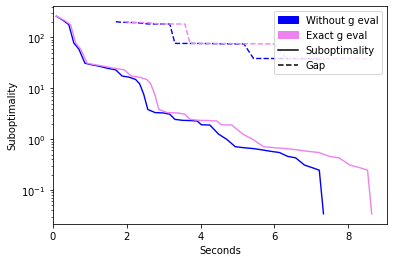

In [19]:
f,ax = plt.subplots()

for alg_idx in range(num_algs):
    ax.semilogy(np.cumsum(runtimes[alg_idx, 0:40]), 
                    objfs_running_min[alg_idx, 0:40] - np.min(objfs), 
                    linewidth=0.7*linewidth, color=colors[alg_idx], linestyle="solid")
    
for alg_idx in range(num_algs):
    ax.semilogy(np.cumsum(runtimes[alg_idx, 0:40]), 
                    objfs_running_min[alg_idx, 0:40] - lower_bounds[alg_idx, 0:40], 
                    linewidth=0.7*linewidth, color=colors[alg_idx], linestyle="dashed")

ax.set_xlim(left=0)
# ax.set_ylim([1e-6, 5e-3])
ax.set_xlabel("Seconds")
ax.legend(loc="upper right", handles=legend_elements)
ax.set_ylabel("Suboptimality")

# plt.savefig("compare_active_cuts_only_runtime.pdf")
# plt.savefig("compare_g_eval_runtime.pdf")

[5.1875 5.225 ]


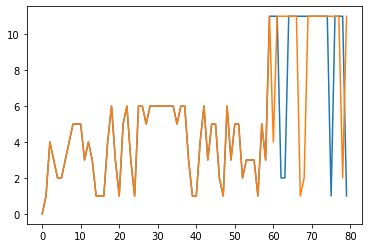

In [20]:
plt.plot(num_f_evals[0, :])
plt.plot(num_f_evals[1, :])
print(np.mean(num_f_evals[:, :], axis=1))